In [7]:
# Efficient numerical arrays.
import numpy as np
# Data frames.
import pandas as pd
# Alternative statistics package.
import statsmodels.stats.weightstats as stat
# Mains statistics package.
import scipy.stats as ss
# Plotting.
import matplotlib.pyplot as plt
# Fancier plotting.
import seaborn as sns
import statsmodels.stats.weightstats as ws

# Better sized plots.
# plt.rcParams['figure.figsize'] = (12, 8)

# Nicer colours and styles for plots.
plt.style.use("fivethirtyeight")

In [3]:
ss.ttest_ind

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [4]:
# Parameters for two different lists of numbers.
m_a, s_a, m_b, s_b = 1.0, 0.4, 1.1, 0.4
# Sample size.
N = 10

# Create two lists of numbers based on bell-shaped probability curves.
a = np.random.normal(loc=m_a, scale=s_a, size=10)
b = np.random.normal(loc=m_b, scale=s_b, size=10)

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['A'] * len(a) + ['B'] * len(b), 'Value': np.hstack([a,b])})

# We can look directly at the list of numbers, but it's not very illuminating.
df

,Category,Value
0,A,0.572903
1,A,1.264170
2,A,2.478583
3,A,0.885322
4,A,1.562276
5,A,1.239347
6,A,0.630152
7,A,0.186033
8,A,1.239800
9,A,1.410302


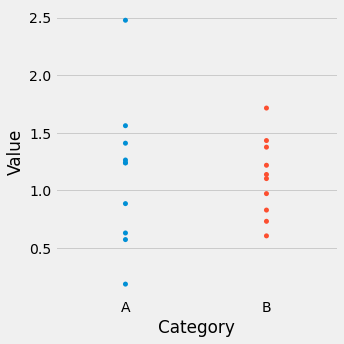

In [5]:
# One type of plot available in seaborn.
sns.catplot(x='Category', y='Value', jitter=False, data=df);

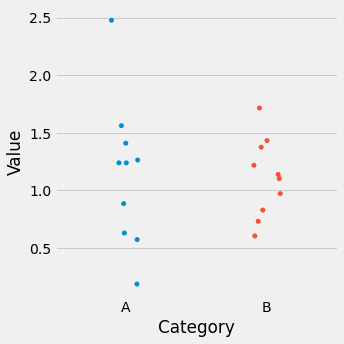

In [11]:
sns.catplot(x = "Category", y = "Value", data = df)

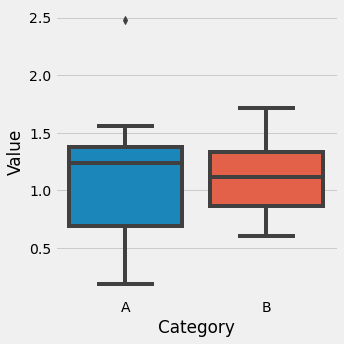

In [12]:
sns.catplot(x = "Category", y = "Value", kind = "box", data = df)

In [36]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"P_scipy: {p_ss:0.2f}")

P_scipy: 0.23


In [6]:
ss.ttest_ind(a,b)

Ttest_indResult(statistic=0.1516817526215657, pvalue=0.881125065253048)

In [8]:
ws.ttest_ind(a,b)

(0.1516817526215657, 0.881125065253048, 18.0)

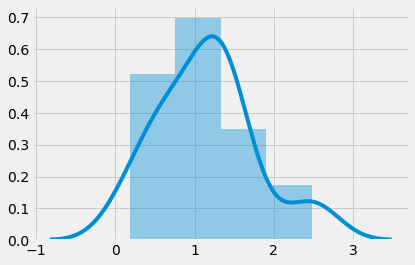

In [9]:
sns.distplot(a)

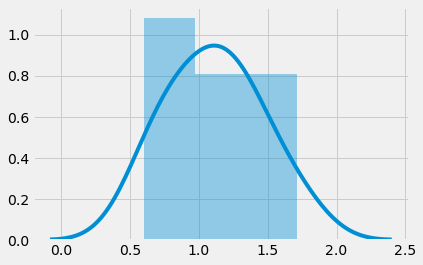

In [10]:
sns.distplot(b)

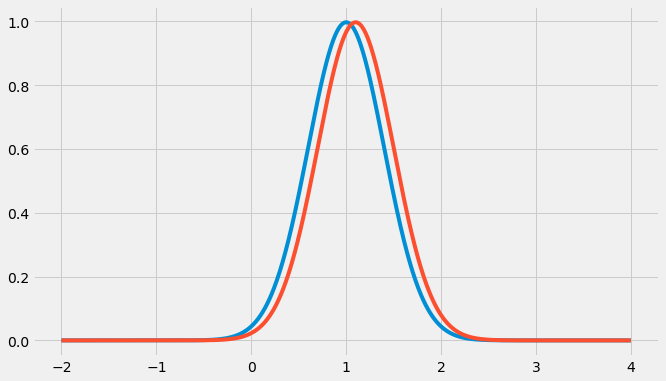

In [37]:
# Let's create a plot with the following x values.
x = np.linspace(-2.0, 4.0, 1000)

# We'll have plots of two different populations on one set of axes.
y_a = ss.norm.pdf(x, m_a, s_a)
y_b = ss.norm.pdf(x, m_b, s_b)

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x, y_a)
ax.plot(x, y_b)

plt.show()

In [42]:
# This code just builds the plot below.

x_t = np.linspace(-4.0, 4.0, 1000)
t = ss.t.pdf(x_t, d_sm)
tf = pd.DataFrame({'x': x_t, 't': t})


tcrit = abs(ss.t.ppf(0.025, d_sm))
one = tf[tf['x'] >= tcrit]
two = tf[tf['x'] <= -tcrit]

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(x_t, t)
ax.fill_between(one['x'], one['t'], 0, facecolor="red")
ax.fill_between(two['x'], two['t'], 0, facecolor="red")

plt.show()

NameError: name 'd_sm' is not defined

In [43]:
# We should make the wrong decision (reject the hypothesis) (100 * critical) percent of the time.

trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.0, 0.3
rejects = 0
critical = 0.05

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] <= critical:
        rejects = rejects + 1

typei = 100.0 * (rejects / trials)
print(f"{typei:0.2f}%")

5.17%


In [44]:
trials = 10000
N = 100
m_a, m_b, s = 2.0, 2.1, 0.3
dont = 0

for i in range(trials):
    a = np.random.normal(loc=m_a, scale=s, size=N)
    b = np.random.normal(loc=m_b, scale=s, size=N)
    if ss.ttest_ind(a, b)[1] > 0.05:
        dont = dont + 1

typeii = 100.0 * (dont / trials)
print(f"{typeii:0.2f}%")

34.33%


In [45]:
dfsleep = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/sleep.csv")
dfsleep

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5
5,6,3.4,1,6
6,7,3.7,1,7
7,8,0.8,1,8
8,9,0.0,1,9
9,10,2.0,1,10


In [46]:
drugA = dfsleep[dfsleep["group"] == 1]
drugA = drugA.sort_values("ID")
drugA = drugA["extra"].to_numpy()
drugA

array([ 0.7, -1.6, -0.2, -1.2, -0.1,  3.4,  3.7,  0.8,  0. ,  2. ])

In [47]:
drugB = dfsleep[dfsleep["group"] == 2]
drugB = drugB.sort_values("ID")
drugB = drugB["extra"].to_numpy()
drugB

array([ 1.9,  0.8,  1.1,  0.1, -0.1,  4.4,  5.5,  1.6,  4.6,  3.4])

In [48]:
ss.ttest_rel(drugA, drugB)

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [49]:
ss.ttest_1samp(drugB - drugA, 0)

Ttest_1sampResult(statistic=4.062127683382037, pvalue=0.00283289019738427)

In [50]:
stat.DescrStatsW(drugB - drugA).ttest_mean(0)

(4.062127683382037, 0.00283289019738427, 9.0)

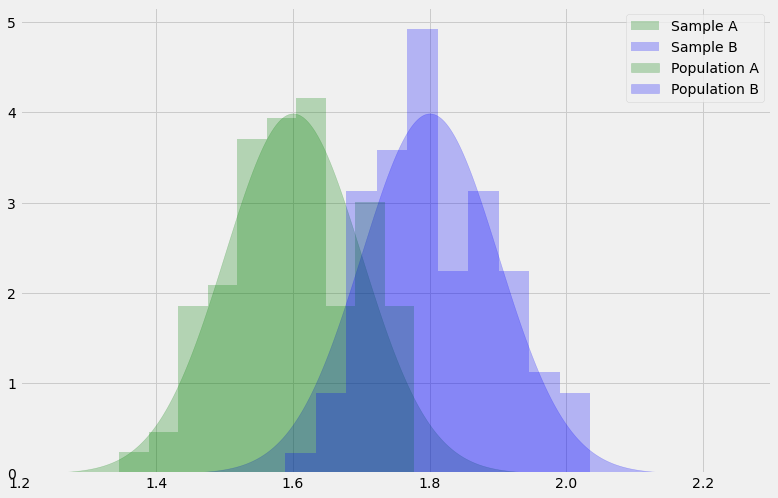

In [51]:
# Set parameters for two populations.
popA = {'m': 1.6, 's': 0.1}
popB = {'m': 1.8, 's': 0.1}

# Create two samples, one from each population.
sampA = np.random.normal(popA['m'], popA['s'], 100)
sampB = np.random.normal(popB['m'], popB['s'], 100)

# x values for plotting.
x = np.linspace(1.25, 2.25, 1000)

# The probability density functions (PDFs) for the two populations.
pdfA = ss.norm.pdf(x, popA['m'], popA['s'])
pdfB = ss.norm.pdf(x, popB['m'], popB['s'])

# Plot the population PDFs as shaded regions.
plt.fill_between(x, pdfA, color='g', alpha=0.25, label="Population A")
plt.fill_between(x, pdfB, color='b', alpha=0.25, label="Population B")

# Plot histograms of the two samples.
plt.hist(sampA, density=True, color='g', alpha=0.25, label="Sample A")
plt.hist(sampB, density=True, color='b', alpha=0.25, label="Sample B")

# Display a legend.
plt.legend()
plt.show()

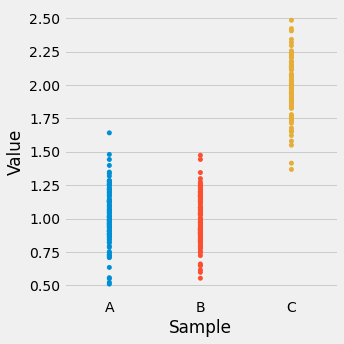

In [52]:
# Size of each sample.
N = 100

# Create three samples.
sampA = np.random.normal(1.0, 0.2, N)
sampB = np.random.normal(1.0, 0.2, N)
sampC = np.random.normal(2.0, 0.2, N)

# Put samples in a single data frame.
sample = ['A'] * N + ['B'] * N + ['C'] * N
values = np.hstack([sampA, sampB, sampC])
dfsamps = pd.DataFrame({'Sample': sample, 'Value': values})

# Visualise samples.
sns.catplot(x='Sample', y='Value', jitter=False, data=dfsamps);

In [53]:
# t-Tests
t_AB, p_AB = ss.ttest_ind(sampA, sampB)
t_AC, p_AC = ss.ttest_ind(sampA, sampC)
t_BC, p_BC = ss.ttest_ind(sampB, sampC)

print(f"p_AB: {p_AB:.2f}\tp_AC: {p_AC:.2f}\tp_BC: {p_BC:.2f}")

p_AB: 0.41	p_AC: 0.00	p_BC: 0.00


In [54]:

# Let's run 1000 tests, remembering our Type I errors.

falsepos = 0

for i in range(1000):
    A = np.random.normal(1.0, 0.2, N)
    B = np.random.normal(1.0, 0.2, N)
    C = np.random.normal(1.0, 0.2, N)
    t_AB, p_AB = ss.ttest_ind(A, B)
    t_AC, p_AC = ss.ttest_ind(A, C)
    t_BC, p_BC = ss.ttest_ind(A, C)
    if p_AB <= 0.05 or p_AC <= 0.05 or p_BC <= 0.05:
        falsepos = falsepos + 1

print(f"False positive rate: {falsepos / 10}%")

False positive rate: 9.6%


ANOVA can be used to avoid a higher Type I error rate.

In [55]:
F, P = ss.f_oneway(sampA, sampB, sampC)
print(f"{P:.2f}")

0.00
